In [ ]:
pip install numpy matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_transactions = 100  # maximum number of transactions per block
transaction_size_range = (1, 10)  # range of transaction sizes
transaction_fee_range = (0.01, 0.1)  # range of transaction fees in Ether
initial_block_reward = 2  # in Ether


In [ ]:
def generate_transactions(num_transactions):
    sizes = np.random.randint(transaction_size_range[0], transaction_size_range[1] + 1, num_transactions)
    fees = np.random.uniform(transaction_fee_range[0], transaction_fee_range[1], num_transactions)
    return sorted(list(zip(sizes, fees)), key=lambda x: x[0])  # Sort by size for SJF

transactions = generate_transactions(max_transactions)


In [ ]:
def process_block(transactions):
    block_reward = initial_block_reward
    total_fees = sum(fee for _, fee in transactions)
    block_reward += total_fees  # Add transaction fees to block reward
    waiting_time = sum(size for size, _ in transactions) / len(transactions)  # Average waiting time based on size
    return block_reward, waiting_time

block_reward, avg_waiting_time = process_block(transactions)


In [ ]:
num_simulations = 50
results = []

for _ in range(num_simulations):
    num_transactions = np.random.randint(1, max_transactions + 1)
    transactions = generate_transactions(num_transactions)
    block_reward, avg_waiting_time = process_block(transactions)
    results.append((num_transactions, block_reward, avg_waiting_time))

# Analyze results
transaction_counts, block_rewards, waiting_times = zip(*results)


In [ ]:
num_simulations = 50
results = []

for _ in range(num_simulations):
    num_transactions = np.random.randint(1, max_transactions + 1)
    transactions = generate_transactions(num_transactions)
    block_reward, avg_waiting_time = process_block(transactions)
    results.append((num_transactions, block_reward, avg_waiting_time))

# Analyze results
transaction_counts, block_rewards, waiting_times = zip(*results)


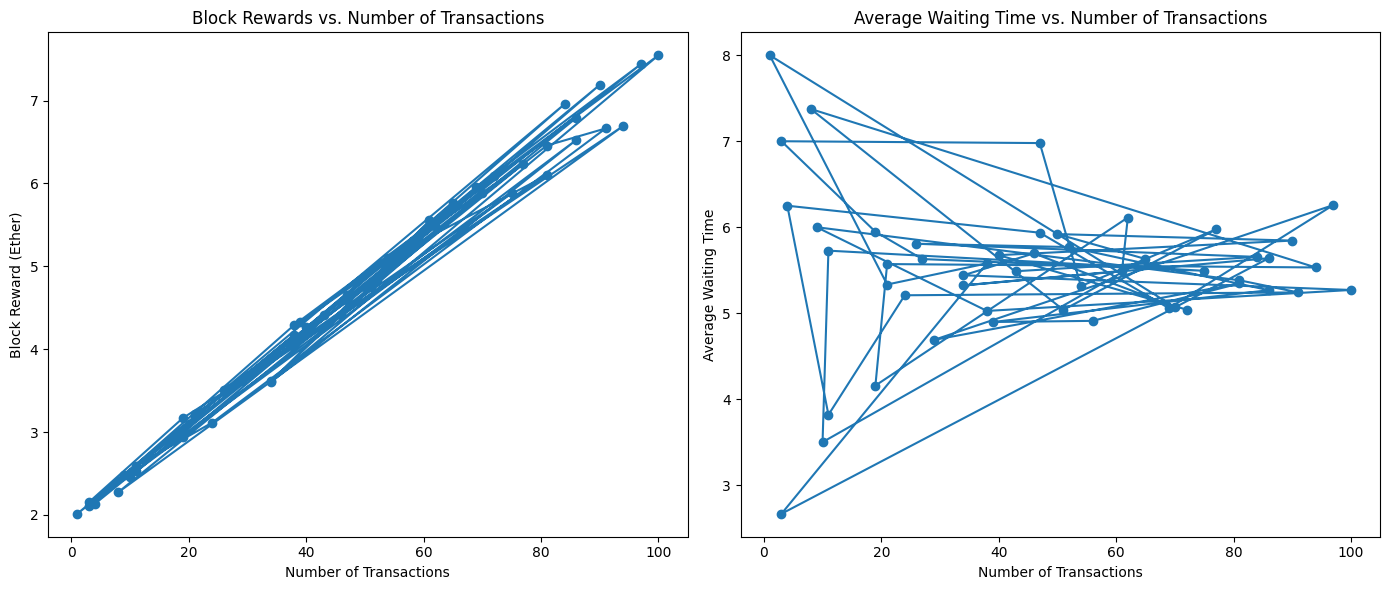

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(transaction_counts, block_rewards, 'o-')
plt.title('Block Rewards vs. Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Block Reward (Ether)')

plt.subplot(1, 2, 2)
plt.plot(transaction_counts, waiting_times, 'o-')
plt.title('Average Waiting Time vs. Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Average Waiting Time')

plt.tight_layout()
plt.show()


In [ ]:
def generate_transactions(num_transactions, with_fees=False):
    sizes = np.random.randint(1, 11, num_transactions)  # Transactions sizes between 1 and 10
    if with_fees:
        fees = np.random.uniform(0.01, 0.1, num_transactions)  # Transaction fees between 0.01 and 0.1 Ether
        return list(zip(sizes, fees))
    else:
        return list(zip(sizes, [0]*num_transactions))  # No fees

def process_block(transactions, use_sjf=False):
    if use_sjf:
        transactions.sort(key=lambda x: x[0])  # Sort transactions by size for SJF
    total_fees = sum(fee for _, fee in transactions)
    block_reward = 2 + total_fees  # Basic block reward of 2 Ether plus transaction fees
    avg_size = np.mean([size for size, _ in transactions])
    return block_reward, avg_size


In [ ]:
num_simulations = 100
results_original = []
results_modified = []

for _ in range(num_simulations):
    num_transactions = np.random.randint(10, 101)  # Number of transactions per block between 10 and 100

    # Original model without SJF and transaction fees
    transactions_original = generate_transactions(num_transactions)
    block_reward_orig, avg_waiting_time_orig = process_block(transactions_original)
    results_original.append((num_transactions, block_reward_orig, avg_waiting_time_orig))

    # Modified model with SJF and transaction fees
    transactions_modified = generate_transactions(num_transactions, with_fees=True)
    block_reward_mod, avg_waiting_time_mod = process_block(transactions_modified, use_sjf=True)
    results_modified.append((num_transactions, block_reward_mod, avg_waiting_time_mod))


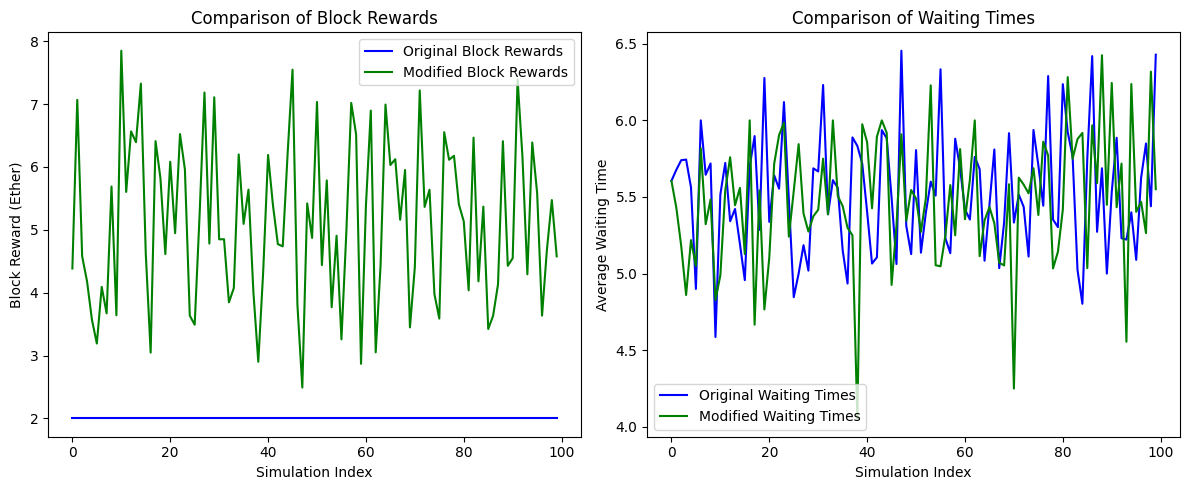

In [ ]:
# Unpack results
_, block_rewards_orig, waiting_times_orig = zip(*results_original)
_, block_rewards_mod, waiting_times_mod = zip(*results_modified)

plt.figure(figsize=(12, 5))

# Plotting block rewards comparison
plt.subplot(1, 2, 1)
plt.plot(block_rewards_orig, label='Original Block Rewards', color='blue')
plt.plot(block_rewards_mod, label='Modified Block Rewards', color='green')
plt.title('Comparison of Block Rewards')
plt.xlabel('Simulation Index')
plt.ylabel('Block Reward (Ether)')
plt.legend()

# Plotting average waiting time comparison
plt.subplot(1, 2, 2)
plt.plot(waiting_times_orig, label='Original Waiting Times', color='blue')
plt.plot(waiting_times_mod, label='Modified Waiting Times', color='green')
plt.title('Comparison of Waiting Times')
plt.xlabel('Simulation Index')
plt.ylabel('Average Waiting Time')
plt.legend()

plt.tight_layout()
plt.show()

